Деревья решений являются одним из наиболее эффективных Эволюционные методы

Эволюционные методы относятся к числу эффективных средств решения задач оптимизации и структурного синтеза проектных решений. Они основаны на использовании принципов оптимального приспособления организмов в живой природе к условиям окружающей среды. К числу эволюционных относятся методы генетические, колонии муравьев, поведения толпы. Наиболее развиты и востребованы в настоящее время генетические алгоритмы. По мере развития техники и технологий растет доля сложных задач проектирования и управления, для решения которых применение традиционных методов проблематично. Поэтому все большее внимание уделяется применению методов искусственного интеллекта.

Для применения ГА необходимо:

выделить совокупность свойств объекта, характеризуемых внутренними параметрами и влияющих на его полезность, т.е. выделить множество управляемых параметров X=(x_1,x_2,…,x_n) среди x_i могут быть величины различных типов (real, integer, Boolean, enumeration). Наличие нечисловых величин (enumeration) обусловливает возможность решения задач не только параметрической, но и структурной оптимизации;

сформулировать количественную оценку полезности вариантов объекта — функцию полезности F. Если в исходном виде задача многокритериальна, то такая формулировка означает выбор скалярного (обобщенного) критерия;

Этапы генетического алгоритма могут быть представлены в следующем виде:
```
for (k=0; k<G; k++)
{ for (j=0; j<N; j++)
  { Выбор родительской пары хромосом;
    Кроссовер;
    Мутации;
    Оценка функции полезности F потомков;
    Селекция;
  }
  Замена текущего поколения новым;
}
```

1.1.1 Пример

Пусть дана начальная популяция из четырех хромосом с двумя генами x и y. Показатель качества хромосомы оценивается функцией Z. При равном качестве хромосом предпочтение отдается хромосоме с большим номером. На каждом этапе хромосома a с высшим качеством порождает четыре новых хромосомы b1, c1, b2, c2, обмениваясь генами с двумя хромосомами b и c более низкого качества по указанной схеме:

![task1](task1.png)

Последняя хромосома (с низшим качеством) выбывает из популяции. Найти максимальный показатель качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции.

Потребуется несколько функций для реализации алгоритма. Напишем их.



Решение:

Начнем с функции оценки качества хромосомы qZ(x,y):

In [40]:
def qZ(x, y):
    return (x-3*y+1) / (3*x**2+3*y**2+1)

In [41]:
# Далее, оценим суммарное качество хромосом:
def qSumZ(Z):
    return sum(Z)

In [42]:
#И запрограммируем представленную выше схему обмена хромосомами:

def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0]  = oldX[sortedId[0]]
    X[1]  = oldX[sortedId[1]]

    Y[0]  = oldY[sortedId[2]]
    Y[1]  = oldY[sortedId[2]]

    Y[2]  = oldY[sortedId[0]]

    Y[3]  = oldY[sortedId[1]]

    return X, Y

In [43]:
# Отсортируем массив качества наших потомков и выделим полученные индексы

def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedId

# Напишем функцию для шага эволюции:

def evoStep(X, Y, Z):
    _, minId = min((val, idx) for (idx, val) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

In [44]:
# Произведем эволюционные изменения, в соответствии с задачей - 4 шага:
def evoSteps(X, Y, stepsNum=4):
    results = []

    for i in range(stepsNum):
        arrZ = [qZ(X[i], Y[i]) for i,x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

In [45]:
# Теперь, когда мы подготовились к решению задачи, написав все необходимые функции для реализации генетического алгоритма, решим задачу в числах. 
# Пусть даны следующие массивы хромосом X и Y

X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

results = evoSteps(X, Y)

In [46]:
#Теперь, выведем полученные значения для показателя качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции. 
# Для этого, воспользуемся циклом по значениям переменной results.

for i in range(len(results[2])):
    print(f'max_{i+1}_step = {results[2][i][2]}')
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += (results[2][i][3])

print(f'qualityArrZ = {max(qualityArrZ)}')

max_1_step = 1.4857142857142858
max_2_step = 1.4615384615384615
max_3_step = 2.967032967032967
max_4_step = 3.5384615384615383
qualityArrZ = 1.0


Задание

Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.

![task2](task2.png)

In [47]:
def Z(x, y):
    return (x+3*y) / (x**2+y**2+1)

# оценим суммарное качество хромосом
def qSumZ(Z):
    return sum(Z)


#запрограммируем представленную выше схему обмена хромосомами
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0]  = oldX[sortedId[0]]
    X[1]  = oldX[sortedId[1]]

    Y[0]  = oldY[sortedId[2]]
    Y[1]  = oldY[sortedId[2]]

    Y[2]  = oldY[sortedId[0]]

    Y[3]  = oldY[sortedId[1]]

    return X, Y

# Отсортируем массив качества наших потомков и выделим полученные индексы
def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedId

# Напишем функцию для шага эволюции
def evoStep(X, Y, Z):
    _, minId = min((val, idx) for (idx, val) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

# Произведем эволюционные изменения, в соответствии с задачей - 4 шага:
def evoSteps(X, Y, stepsNum=4):
    results = []

    for i in range(stepsNum):
        arrZ = [qZ(X[i], Y[i]) for i,x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

# Теперь, когда мы подготовились к решению задачи, написав все необходимые функции для реализации генетического алгоритма, решим задачу в числах. 
# Пусть даны следующие массивы хромосом X и Y

X = [-5, -3, -2, -1]
Y = [-1, -2, 0, 1]

results = evoSteps(X, Y)

#Теперь, выведем полученные значения для показателя качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции. 
# Для этого, воспользуемся циклом по значениям переменной results.

for i in range(len(results[2])):
    print(f'max_{i+1}_step = {results[2][i][2]}')
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += (results[2][i][3])

print(f'qualityArrZ = {max(qualityArrZ)}')

max_1_step = -0.4181527333426067
max_2_step = 0.18355676581483035
max_3_step = 0.44772727272727275
max_4_step = 0.625
qualityArrZ = 0.2


Алгоритм отжига – это метод оптимизации, который называется отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из названия, метод поиска моделирует процесс восстановления. 

Восстановление – это физический процесс, который заключается в нагреве и последующем контролируемом охлаждении субстанции. В результате получается прочная кристаллическая структура, которая отличается от структуры с дефектами, образующейся при быстром беспорядочном охлаждении. Структура здесь представляет собой кодированное решение, а температура используется для того, чтобы указать, как и когда будут приниматься новые решения. 

Алгоритм имитации отжига включает следующие этапы:
![ex2](ex2.png)

Метод отжига может быть эффективным при решении задач различных классов, требующих оптимизации. Ниже приводится их краткий список:

создание пути;

реконструкция изображения;

назначение задач и планирование;

размещение сети;

глобальная маршрутизация;

обнаружение и распознавание визуальных объектов;

разработка специальных цифровых фильтров.

Поскольку метод отжига представляет собой процесс генерации случайных чисел, поиск решения с использованием данного алгоритма может занять значительное время. В некоторых случаях алгоритм вообще не находит решение или выбирает не самое оптимальное. Алгоритм отжига как способ выполнения процедур поиска и оптимизации. Данный метод является аналогом процесса нагревания тела до состояния плавления с последующим постепенным охлаждением. При высоких температурах поиск ведется по всему диапазону. При снижении температуры диапазон поиска уменьшается до небольшой области вокруг текущего решения.

1.2.1 Пример

Итак, начальные условия задачи представляют собой следующий граф с расстояниями между ребрами:

![ex3](ex3.png)

Рассмотрим решение с применением Python.



In [48]:
import networkx as nx
from math import e

Далее, опишем массив длин ребер, последовательности прохождение вершин на маршруте и их замены, значения P, а также начальную температуру

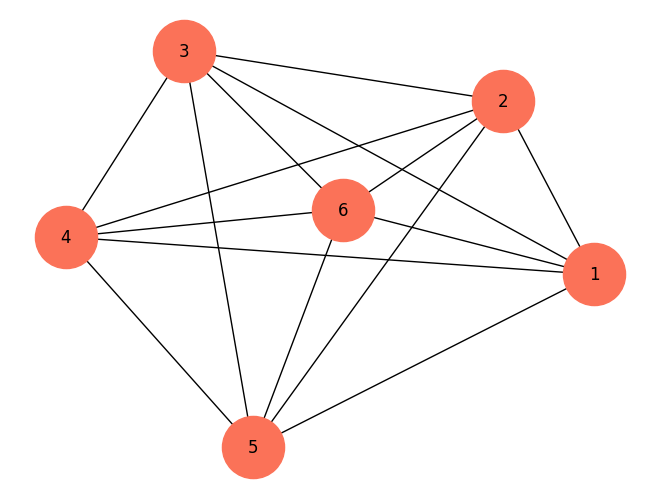

In [49]:
distances = [(1,2,20),
             (1,3,40),
             (1,4,42),
             (1,5,33),
             (1,6,21),
             (2,3,26),
             (2,4,38),
             (2,5,42),
             (2,6,17),
             (3,4,22),
             (3,5,43),
             (3,6,21),
             (4,5,27),
             (4,6,22),
             (5,6,26),
             ] # длины ребер

V = [1,4,5,2,6,3,1] # последовательность прохождения маршрута
Z = [(3,4),
     (4,6),
     (5,2),
     (6,2)
     ] # последовательность замен вершин

P = [49,54,43,54] # случайные числа, выпавшие в процессе счета

T = 100 # начальная температура

# Запишем функции вероятности и изменения температуры

def probabilty(delta, T):
    return 100 * e ** (-delta/T)

def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

# Построим граф по заданным вершинам, как в начальном условии

graph = nx.Graph() # пустой граф
graph.add_weighted_edges_from(distances) # добавление весов ребер

# отрисовка графа с заданными вершинами

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 5, 2, 3, 4, 6, 1]
Длина лучшего выбранного маршрута: 101
Длины всех рассмотренных маршрутов: [83, 107, 86, 94, 101]


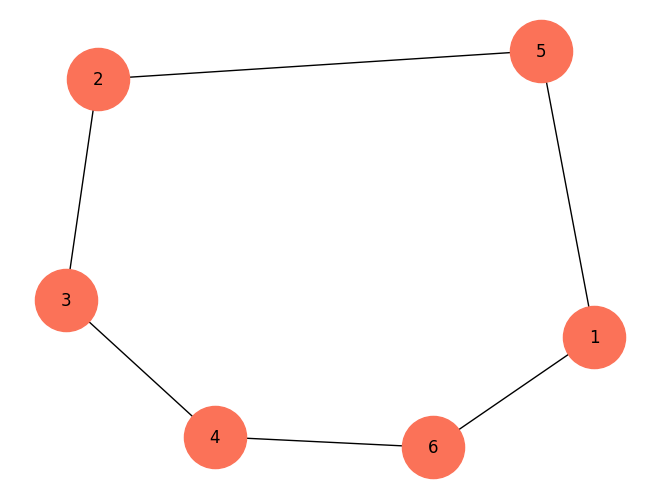

In [50]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[0] == i and item[1] == j) else -1) \
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) \
                    for item in distances])
    
# вычисление длины маршрута
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))
    
    return sum(edges)

# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V 

# выбор нужного пути методом отжига

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probabilty(deltaS, T) # подсчет вероятности

            # если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T) # вычисление температуры
    
    return V, arrSum

# отрисовка графа по заданному маршруту

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] \
            or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
                newDistances.append(distance)

    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.

![lasttask](task3.png)

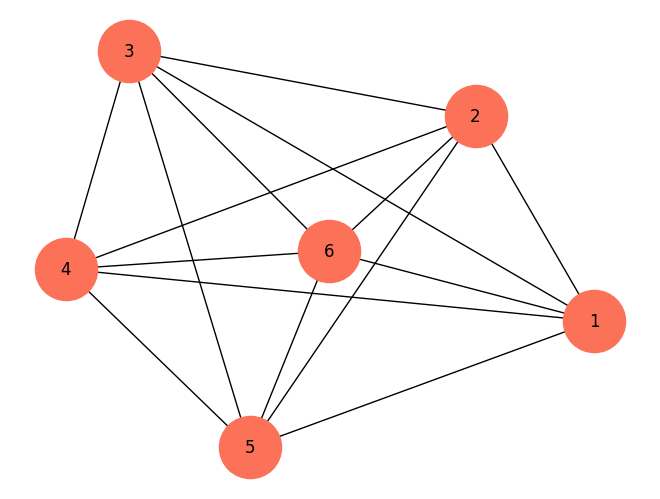

In [51]:
distances = [(1,2,22),
             (1,3,43),
             (1,4,39),
             (1,5,28),
             (1,6,20),
             (2,3,26),
             (2,4,33),
             (2,5,36),
             (2,6,17),
             (3,4,22),
             (3,5,40),
             (3,6,24),
             (4,5,22),
             (4,6,19),
             (5,6,20),
             ] # длины ребер

V = [1,3,4,5,6,2,1] # последовательность прохождения маршрута
Z = [(2,4),
     (4,6),
     (3,5),
     (5,2),
     ] # последовательность замен вершин

P = [51,23,29,31] # случайные числа, выпавшие в процессе счета

T = 100 # начальная температура

# Запишем функции вероятности и изменения температуры

def probabilty(delta, T):
    return 100 * e ** (-delta/T)

def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

# Построим граф по заданным вершинам, как в начальном условии

graph = nx.Graph() # пустой граф
graph.add_weighted_edges_from(distances) # добавление весов ребер

# отрисовка графа с заданными вершинами

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 6, 4, 2, 5, 3, 1]
Длина лучшего выбранного маршрута: 52
Длины всех рассмотренных маршрутов: [105, 48, 41, 78, 52]


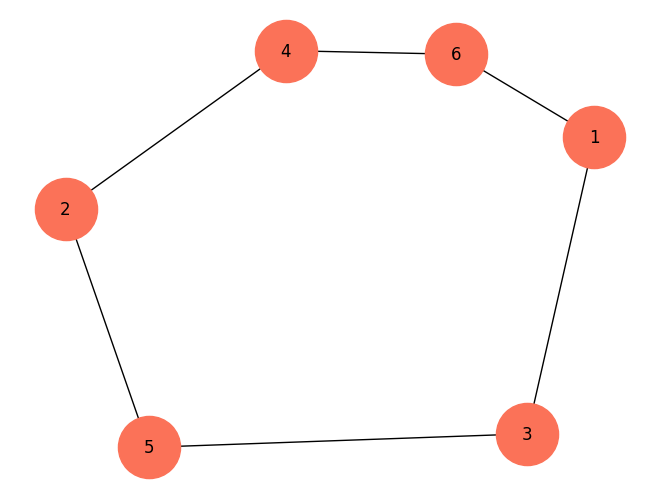

In [52]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[0] == i and item[1] == j) else -1) \
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) \
                    for item in distances])
    
# вычисление длины маршрута
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))
    
    return sum(edges)

# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V 

# выбор нужного пути методом отжига

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probabilty(deltaS, T) # подсчет вероятности

            # если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T) # вычисление температуры
    
    return V, arrSum

# отрисовка графа по заданному маршруту

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] \
            or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
                newDistances.append(distance)

    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)